In [23]:
%load_ext watermark
%watermark -a Chan -d -v -p bs4,requests,xml,sqlite3,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Chan 2019-08-02 

CPython 3.7.3
IPython 7.6.1

bs4 4.7.1
requests 2.22.0
xml unknown
sqlite3 2.6.0
pandas 0.24.2


In [24]:
from scrapAfrica import get_chat

In [25]:
??get_chat

In [79]:
chatdata = get_chat('http://vod.afreecatv.com/PLAYER/STATION/37089981')

In [80]:
chatdata

array([['뭐야', 'j1237538', '2.134'],
       ['아', 'mshr1010', '2.134'],
       ['개노잼', 'ghdwo1211', '2.134'],
       ...,
       ['ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 'psh8206', '3602.176'],
       ['ㅋㅋㅋㄱㄱ', 'dthrky', '3602.176'],
       ['세친놈', 'rkdgjsrn77', '3602.176']], dtype='<U109')

# db

In [28]:
import sqlite3

In [81]:
conn = sqlite3.connect('./africa.db')
cur = conn.cursor()

In [82]:
# cur.executescript("""
# DROP table chat;
# DROP table url;
# DROP table netloc;
# DROP table jamak;
# DROP table bj;
# DROP table writer;
# """)
# conn.commit()

In [84]:
# cur.executescript("""

# CREATE TABLE chat(
# id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
# content TEXT NOT NULL,
# writer_id INTEGER  NOT NULL,
# w_time TEXT NOT NULL, 
# url_id INTEGER NOT NULL
# );

# """)

cur.executemany("""
    INSERT INTO chat (content, writer_id, w_time, url_id)
    VALUES (?, ?, ?, '37089981')
""", chatdata)
conn.commit()

In [85]:
cur.close()
conn.close()

In [ ]:
cur.execute("""
    SELECT * FROM chat;
""")
conn.commit()

# EDA

In [9]:
import pandas as pd

In [10]:
# data = pd.DataFrame(cur.fetchall(), columns=['id', 'chat', 'userid', 'timestamp','url'])

In [11]:
data.set_index('id',inplace=True)

In [12]:
data.head()

,chat,userid,timestamp,url
id,,,,
1,ㅂㅇㄹ,coupling,23.434,46201530
2,보겸이 왔냐 ?,kof054,31.258,46201530
3,ㅂㅇㄹ,ghtmd486,39.300,46201530
4,하이,yyc32425,39.500,46201530
5,새벽에좀 키지마 미띤너마!!,thfhsp123,43.614,46201530


In [14]:
data.timestamp = data.timestamp.astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 1 to 5506
Data columns (total 4 columns):
chat         5506 non-null object
userid       5506 non-null object
timestamp    5506 non-null float64
url          5506 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 215.1+ KB


In [23]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [24]:
tmp = data.chat
text = '\n'.join(set(tmp))

In [25]:
wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800,
              background_color='white').generate(text)

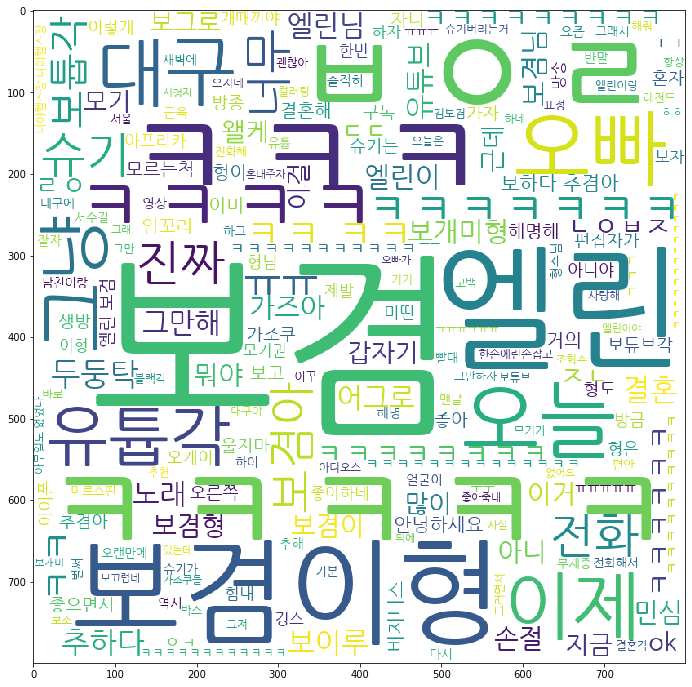

In [26]:
fig = plt.figure(figsize=(12,12))
plt.imshow(wc);
fig.savefig('bogum.png')